# Anti-Hater Filter for Social Networks

In recent years, online content moderation has become a critical challenge for many platforms facing an increasing volume of potentially harmful comments. These comments can include insults, threats, obscene content, or hate speech. Manual moderation is ineffective at scale, and traditional algorithms often fail to capture the complexity and variety of offensive language.

**The Problem to Solve**

The company **TechTalk**, a forum for technology enthusiasts, has found that a significant number of comments posted in community threads contain hate speech and insults that compromise the quality of discussions. Users have reported that, due to its growing popularity, the platform struggles to manage the flow of harmful comments using traditional moderation tools. **TechTalk** has turned to **DeepCortex AI Solutions** to implement an automated moderation solution based on Deep Learning that can filter toxic comments in real-time.

**DeepCortex AI Solutions** has decided to develop an advanced system based on Deep Learning technologies to automate and improve the moderation process. At the heart of the project is a deep learning model featuring **recurrent layers**, designed to classify comments into multiple toxicity categories.

**Use Case**

**Real-world scenario:** Mario Rossi, community manager at TechTalk, handles the manual moderation of user-generated content daily. With the increase in platform traffic, Mario can no longer manually manage the volume of harmful comments and must find a way to automatically filter offensive, threatening, or obscene comments without slowing down the user experience.

---

**Technical Model Requirements**

* **Task:** Multi-label classification of comments into 6 categories:
1. Toxic
2. Severely Toxic
3. Obscene
4. Threat
5. Insult
6. Identity Hate


* **Dataset:** A dataset of 160,000 comments will be provided, with each comment labeled in one or more of the categories above. Comments may have zero or more active labels.
* **Architecture:** The model must include **recurrent layers** (e.g., LSTM or GRU) to handle the sequential nature of textual comments.
* **Output:** At the inference level, for each comment, the model must produce a vector of 6 elements (one for each label) with binary values (0 or 1), where 1 indicates the presence of the corresponding label and 0 its absence.

---

**Project Phases**

**1. Data Preprocessing**

* Textual comments must be converted into numerical sequences (tokenization).
* Data must be normalized and balanced to ensure all toxicity categories are represented fairly.

**2. Model Development**

* The deep learning model will be based on a recurrent architecture capable of capturing long-term dependencies between words in comments.
* Recurrent layers (LSTM or GRU) will be implemented for the multi-label classification task.

**3. Model Training**

* The dataset will be split into training, validation, and test sets.
* Advanced optimization techniques will be used to improve model convergence.

**4. Inference and Prediction**

* During inference time, for each comment, the model will return a 6-element vector of 0s or 1s, depending on the presence of toxicity in one or more of the predicted categories.

**5. Validation**

* The model will be evaluated using metrics such as **Accuracy**, **F1-score** for each category, and **Global Precision** in predicting multiple labels.

---

**Added Value**

* **Automation:** The model will significantly reduce the manual moderation workload, allowing TechTalk to handle a larger number of comments in real-time while maintaining a safe environment for users.
* **Efficiency:** By using recurrent layers, the model will better capture the context and nuances of textual comments, improving prediction accuracy compared to traditional methods.
* **Scalability:** Once implemented, the system will be easily scalable to handle growing volumes of data, adapting to the increasing number of users and comments on the platform.
* **Integration:** The solution will be integrated directly into TechTalk's commenting system, making automatic filtering immediately operational without negatively impacting user experience.

**Dataset**

The dataset can be downloaded from this link:

[Filter_Toxic_Comments_dataset.csv](https://proai-datasets.s3.eu-west-3.amazonaws.com/Filter_Toxic_Comments_dataset.csv)

## Import

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import time
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit



## Functions

In [2]:
def count_uppercase(text):
    '''
    Counts the number of uppercase characters in a given text.
    @param text: The input text to analyze.
    '''
    if not isinstance(text, str):
        return 0
    return sum(1 for char in text if char.isupper())

In [3]:
def plot_multi_bar(count_series, perc_series, title, figsize=(10, 6)):
    '''
    Plots a multi-bar chart with two y-axes: one for count and one for percentage.
    @param count_series: A pandas Series containing the count values for each category.
    @param perc_series: A pandas Series containing the percentage values for each category.
    @param title: The title of the plot.
    '''
    w, h = figsize
    base_font_size = min(w, h)
    title_size = base_font_size * 2
    label_size = base_font_size * 1.5
    tick_size = base_font_size * 1.2
    bar_label_size = base_font_size * 1.3
    legend_size = base_font_size * 1.5
    
    categories = count_series.index
    x = np.arange(len(categories))
    width = 0.35
    fig, ax1 = plt.subplots(figsize=figsize)

    # first axes - count
    barre1 = ax1.bar(x - width/2 - 0.05, count_series, width, 
                    label='Count', color='#3498db', edgecolor='white')

    ax1.set_ylabel('Sum', color='#3498db', fontsize=label_size, fontweight='bold')
    ax1.set_ylim(0, max(count_series)*1.2)
    ax1.tick_params(axis='y', labelcolor='#3498db', labelsize=tick_size)
    ax1.grid(axis='y', linestyle='--', alpha=0.3) 
    ax1.bar_label(barre1, padding=3, color='#3498db', fontsize=bar_label_size)

    # second axes - percentage
    ax2 = ax1.twinx()
    barre2 = ax2.bar(x + width/2 + 0.05, perc_series, width, 
                    label='Percentage', color='#e67e22', edgecolor='white')
    ax2.set_ylabel('Percentage (%)', color='#e67e22', fontsize=label_size, fontweight='bold')
    ax2.set_ylim(0, 100)
    ax2.tick_params(axis='y', labelcolor='#e67e22', labelsize=tick_size)
    ax2.bar_label(barre2, padding=3, color='#e67e22', fontsize=bar_label_size, fmt='%.2f%%')

    # legend
    ax1.set_xticks(x)
    ax1.set_xticklabels(categories)
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', frameon=True, fontsize=legend_size)

    plt.title(title, fontsize=title_size, pad=20)
    plt.tight_layout()
    plt.show()

In [4]:
def normalize_unicode(text):
    return text.encode('utf-8', 'ignore').decode('utf-8', 'ignore')

def remove_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def replace_urls_emails(text):
    url_pattern = re.compile(r'http\S+|www\S+|https\S+')
    return url_pattern.sub(r'url', text)

def clean_spacing(text):
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub(r'\n+', ' ', text)  
    return text.strip() 

def base_clean(text):
    text = normalize_unicode(text)
    text = remove_html(text)
    text = replace_urls_emails(text)
    text = clean_spacing(text)
    return text

def get_number_tokens(text):
    text = base_clean(text)
    return len(text.split())

In [5]:
def print_label_distribution(y, name):
    df_dist = pd.DataFrame(y, columns=labels_df.columns)
    print(f"\n{name} - Distribution:")
    print(df_dist.sum())
    print(f"Positive Percentage: {(y.sum(axis=1) > 0).mean()*100:.2f}%")

## Load Data

In [6]:
dataset_path ="https://proai-datasets.s3.eu-west-3.amazonaws.com/Filter_Toxic_Comments_dataset.csv"
dataset = pd.read_csv(dataset_path)

In [7]:
dataset.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_injurious
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


# EDA

In [8]:
dataset.info()

<class 'pandas.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   comment_text   159571 non-null  str  
 1   toxic          159571 non-null  int64
 2   severe_toxic   159571 non-null  int64
 3   obscene        159571 non-null  int64
 4   threat         159571 non-null  int64
 5   insult         159571 non-null  int64
 6   identity_hate  159571 non-null  int64
 7   sum_injurious  159571 non-null  int64
dtypes: int64(7), str(1)
memory usage: 9.7 MB


## Labels distribution

In [9]:
count_sum_inj = dataset["sum_injurious"].value_counts()
count_perc_inj = count_sum_inj/len(dataset) * 100

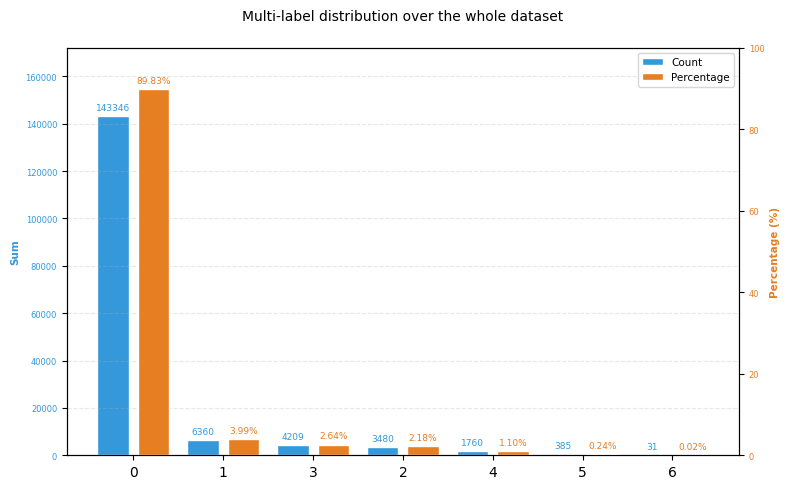

In [10]:
plot_multi_bar(count_sum_inj, 
               count_perc_inj, 
               'Multi-label distribution over the whole dataset',
               figsize=(8,5))

In [11]:
count_labels = dataset.drop(columns=['sum_injurious', 'comment_text']).sum(axis=0)
percent_labels = count_labels/len(dataset) * 100

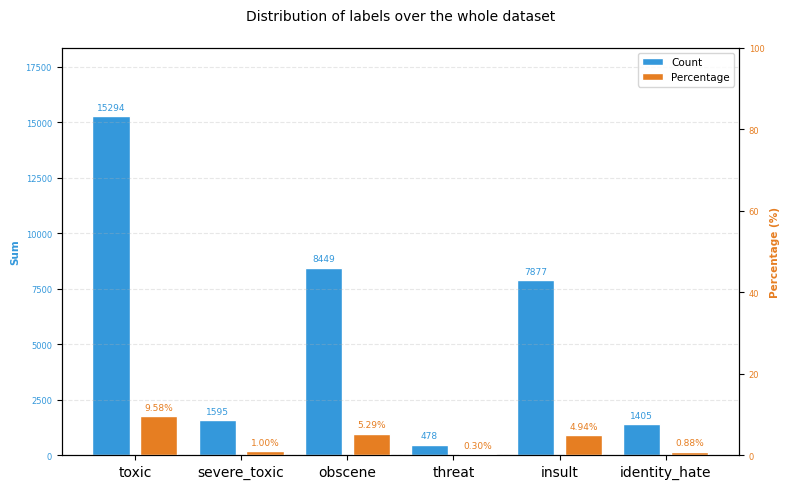

In [12]:
plot_multi_bar(count_labels, percent_labels, 
               'Distribution of labels over the whole dataset',
               figsize=(8,5))

## Co-occurence labels analysis

In [13]:
# co-occurence matrix
labels_df = dataset.drop(columns=['sum_injurious', 'comment_text'])
co_occurrence_matrix = labels_df.T.dot(labels_df)

In [14]:
# co-occurence matrix normalized on the total count of each label by column
tot_labels_count = np.diag(co_occurrence_matrix) 
cond_prob_matrix = co_occurrence_matrix.div(tot_labels_count, axis=1)

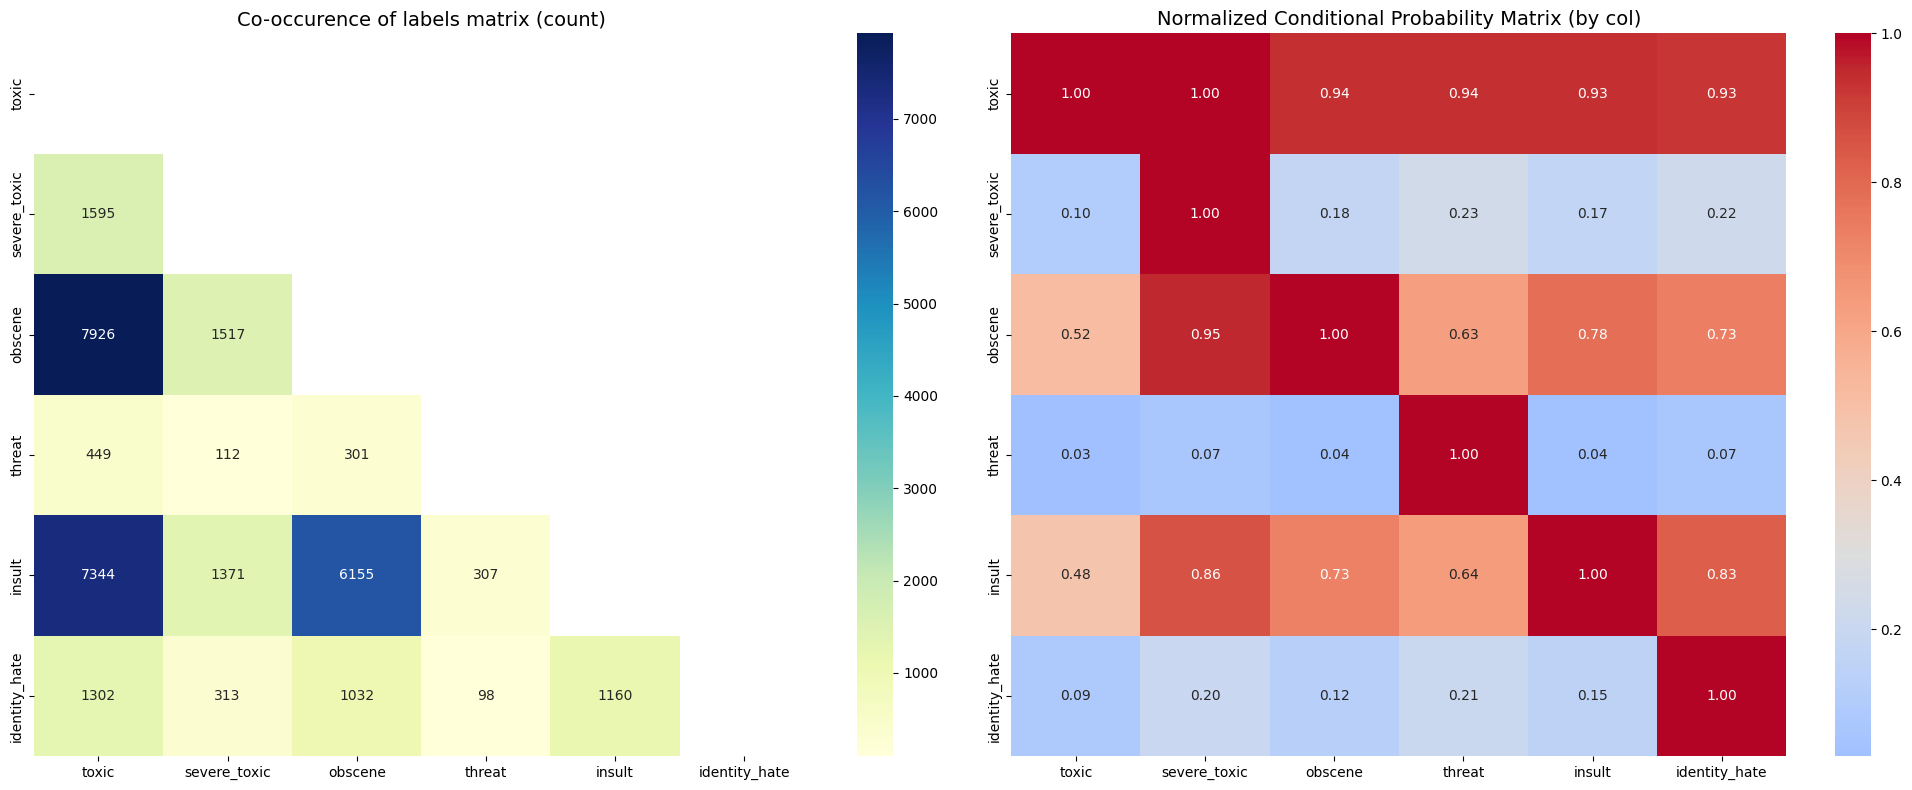

In [15]:
# plots co-occurence of labels
mask = np.triu(np.ones_like(co_occurrence_matrix, dtype=bool))
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='YlGnBu', mask=mask, )
plt.title('Co-occurence of labels matrix (count)', fontsize=14)

plt.subplot(1,2,2)
sns.heatmap(cond_prob_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0.3)
plt.title('Normalized Conditional Probability Matrix (by col)', fontsize=14)

plt.tight_layout()
plt.show();

💡 **Observation**

- **IMBALANCE**: Most of the comments ($89 \%$) in the dataset have no hate label, so we have non hate-hate comment ratio of $8,9$.
- The *sum_injurious* feature explain the information about how many labels are true for the record $[0;6]$
- The most common label in the hate comments is *toxic* (in almost all hate comments), followed by *obscene* and *insult*. The labels *severe_toxic*, *threat* and *identity_hate* have less than $1%$ of representation in the dataset.

We can see from the heatmap (especially from the normalized one) how the labels appear in co-occurence:
- almost all hate comments are labeled *toxic*, so every other label has a very high co-occurence probability with that label (all over 93%)
- comments *toxic*: 48% are also *insult* and 52% are also *obscene*
- comments *severe_toxic*: 86% are also *insult* and 95% are also *obscene*
- comments *obscene*: 73% are also *insult*
- comments *threat*: 74% are also *insult* and 63% are also *obscene*
- comments *insult*: 78% are also *obscene* 
- comments *identity_hate*: 83% are also *insult* and 73% are also *obscene*

## Case sensitivity

In [16]:
# Count uppercase characters
dataset['num_uppercase'] = dataset['comment_text'].apply(count_uppercase)

In [17]:
# Create a binary 'hate' column based on 'sum_injurious'
dataset['hate'] = dataset['sum_injurious'].apply(lambda x: 1 if x > 0 else 0)

In [18]:
# Calculate mean number of uppercase characters for each label
df_uppercase_labels = pd.DataFrame(columns=['uppercase_mean'])
for col in labels_df.columns:
    mean = dataset.groupby(col)['num_uppercase'].mean()
    df_uppercase_labels.loc[col] = mean[1]
    
df_uppercase_labels

,uppercase_mean
toxic,44.190859
severe_toxic,154.927273
obscene,50.508818
threat,76.297071
insult,49.329821
identity_hate,72.030605


In [19]:
# Calculate mean number of uppercase characters for non-hate comments
non_hate_uppercase_mean = dataset[dataset['hate'] == 0]['num_uppercase'].mean()

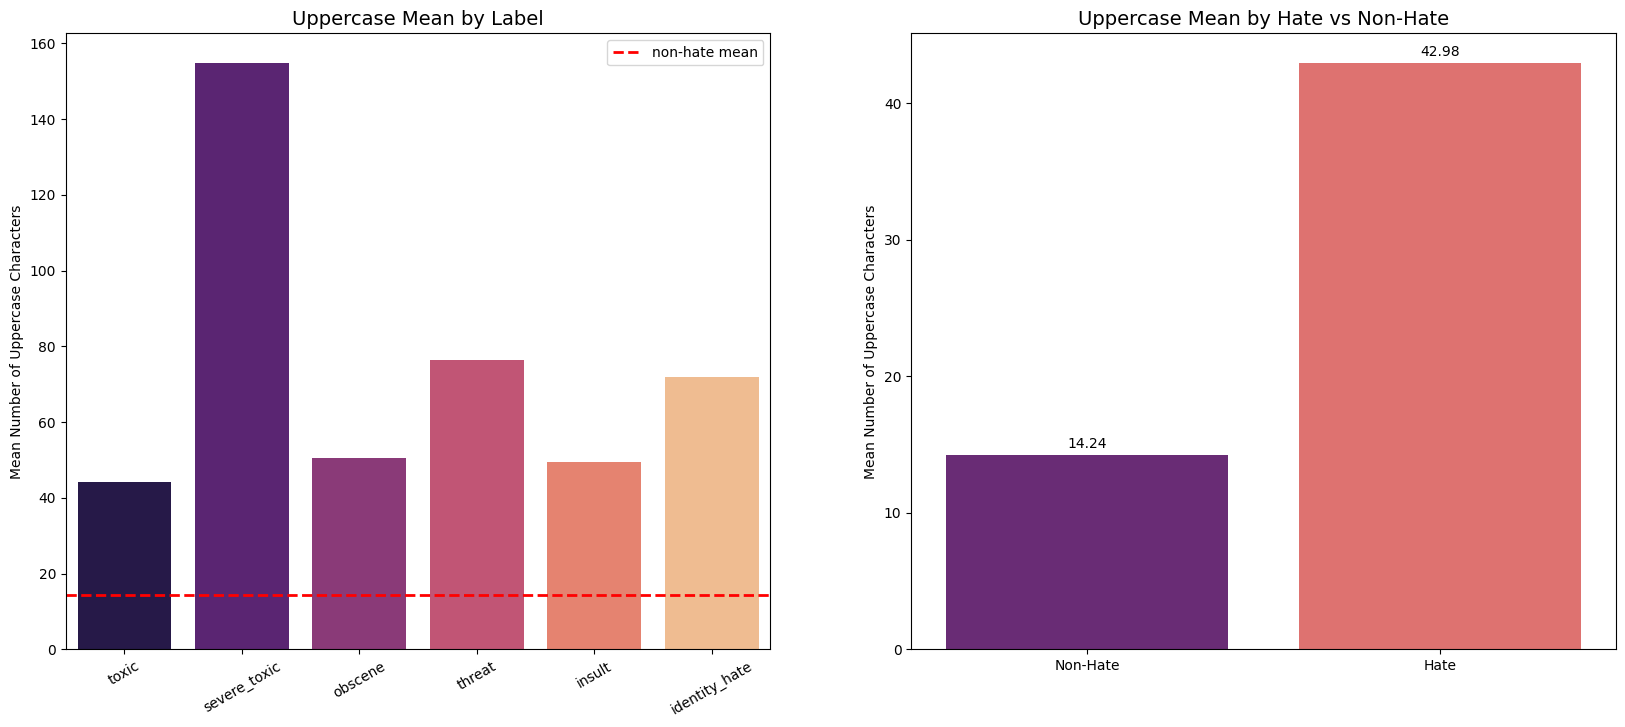

In [20]:
# Plot mean number of uppercase characters
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sns.barplot(data=df_uppercase_labels, 
            x=df_uppercase_labels.index, y='uppercase_mean', hue=df_uppercase_labels.index,
            estimator='mean', errorbar=None,
            palette='magma')

plt.title('Uppercase Mean by Label', fontsize=14)
plt.xticks(rotation=30)
plt.xlabel(None)
plt.ylabel('Mean Number of Uppercase Characters')
plt.axhline(y=non_hate_uppercase_mean, 
            color='red', 
            linestyle='--', 
            linewidth=2, 
            label='non-hate mean')
plt.legend()

plt.subplot(1,2,2)
sns.barplot(data=dataset[['num_uppercase', 'hate']], 
            x='hate', y='num_uppercase', hue='hate',
            estimator='mean', errorbar=None, legend=False,
            palette='magma')

for container in plt.gca().containers:
    plt.gca().bar_label(container, padding=3, fmt='%.2f')
plt.title('Uppercase Mean by Hate vs Non-Hate', fontsize=14)
plt.xticks(ticks=[0,1], labels=['Non-Hate', 'Hate'])
plt.xlabel(None)
plt.ylabel('Mean Number of Uppercase Characters')
plt.show();

💡 **Observation**

From the case sensitivity analysis we can say that in hate comments the mean of uppercase characters is very higher (43 vs 14). 

Looking at the hate comments we can see the mean distribution by label of the uppercase characters and concluding that *severe_toxic* has the highest value (154) and after there are *threat* and *identity_hate* (76, 72), the others are close to the mean of the entire group.

This analysis let us know that the uppercase count can give an information to the model about the prediction of the label.

## Length Analysis 

In [21]:
dataset['text_char_length'] = dataset['comment_text'].apply(lambda x: len(str(x)))

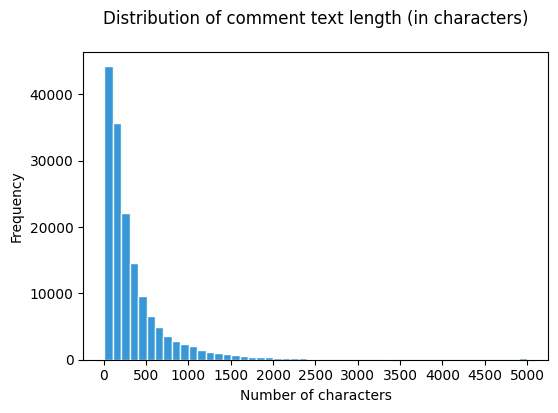

In [22]:
# Plot distribution of comment text length in characters
dataset['text_char_length'].plot(kind="hist", bins=50, figsize=(6, 4), color="#3498db", edgecolor='white')
plt.title('Distribution of comment text length (in characters)', pad=20)
plt.xticks(np.arange(0, dataset['text_char_length'].max()+1, 500))
plt.xlabel('Number of characters')
plt.show()

In [23]:
# apply simple tokenization for length analysis
dataset['tokens_number'] = dataset['comment_text'].apply(get_number_tokens)

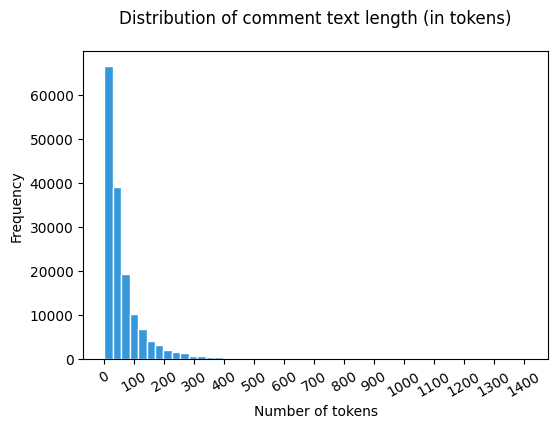

In [24]:
# Plot distribution of comment text length in tokens
dataset['tokens_number'].plot(kind="hist", bins=50, figsize=(6, 4), color="#3498db", edgecolor='white')
plt.title('Distribution of comment text length (in tokens)', pad=20)
plt.xticks(np.arange(0, dataset['tokens_number'].max()+1, 100), rotation=30)
plt.xlabel('Number of tokens')
plt.show()

In [25]:
# % of comments over 1000 characters and over 200 tokens
len_over_k_char = dataset[dataset['text_char_length'] > 1000].shape[0]
len_over_k_tokens = dataset[dataset['tokens_number'] > 200].shape[0]
print(f"Number of comments with more than 1000 characters: {len_over_k_char/dataset.shape[0]*100:.2f}%")
print(f"Number of comments with more than 200 tokens: {len_over_k_tokens/dataset.shape[0]*100:.2f}%")

Number of comments with more than 1000 characters: 8.37%
Number of comments with more than 200 tokens: 6.32%


In [26]:
# stats distribution of comments' length 
dataset[['text_char_length', 'tokens_number']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
text_char_length,159571.0,394.073221,590.720282,6.0,96.0,205.0,435.0,5000.0
tokens_number,159571.0,67.267229,99.208728,0.0,17.0,36.0,75.0,1411.0


💡 **Observation**

- The average length of the comment text is *394 characters* and *67 tokens*
- 50% of the comments have less than *205 characters* and *36 tokens*
- 75% of the comments have les than *435 characters* and *75 tokens*
- There are also some longer comments:
    - with over 1000 characters only 8%
    - with over 200 tokens 6%

To better capture the semantic meaning and relationship of the text we will select models and algorithms that works well with short texts.

# Preprocess

## Dataset division

- Train 70%
- Validation 15%
- Test 15%

Stritified to mantain the proportion of the labels distribution

In [27]:
# Prepare data for splitting
texts = dataset['comment_text'].values
labels = labels_df.values

# split Train vs (Val+Test)
msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=42)
train_idx, temp_idx = next(msss.split(texts, labels))

X_train = texts[train_idx]
y_train = labels[train_idx]

X_temp = texts[temp_idx]
y_temp = labels[temp_idx]

print(f"\nTrain size: {len(X_train)} ({len(X_train)/len(texts)*100:.1f}%)")
print(f"Temp (Val+Test) size: {len(X_temp)} ({len(X_temp)/len(texts)*100:.1f}%)")


# split (Val+Test) → Val e Test
msss2 = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
val_idx, test_idx = next(msss2.split(X_temp, y_temp))

X_val = X_temp[val_idx]
y_val = y_temp[val_idx]

X_test = X_temp[test_idx]
y_test = y_temp[test_idx]

print(f"Val size: {len(X_val)} ({len(X_val)/len(texts)*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/len(texts)*100:.1f}%)")


Train size: 111699 (70.0%)
Temp (Val+Test) size: 47872 (30.0%)
Val size: 23936 (15.0%)
Test size: 23936 (15.0%)


In [28]:
# stratification check
print_label_distribution(y_train, "TRAIN")
print_label_distribution(y_val, "VAL")
print_label_distribution(y_test, "TEST")


TRAIN - Distribution:
toxic            10706
severe_toxic      1116
obscene           5914
threat             335
insult            5514
identity_hate      983
dtype: int64
Positive Percentage: 10.15%

VAL - Distribution:
toxic            2294
severe_toxic      240
obscene          1267
threat             71
insult           1182
identity_hate     211
dtype: int64
Positive Percentage: 10.19%

TEST - Distribution:
toxic            2294
severe_toxic      239
obscene          1268
threat             72
insult           1181
identity_hate     211
dtype: int64
Positive Percentage: 10.21%


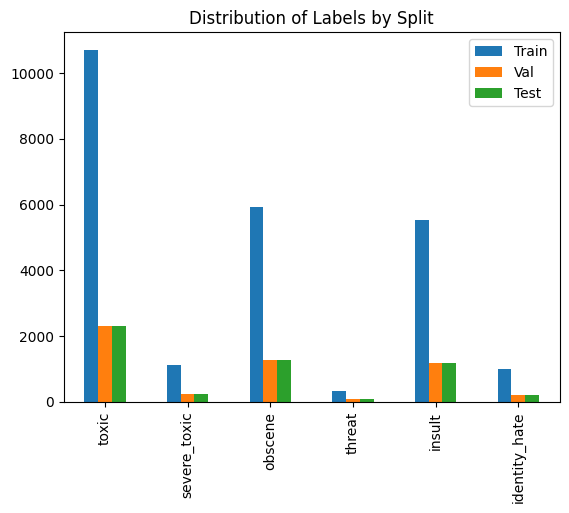

In [29]:
# bar plot distribution of labels in each split
counts = pd.DataFrame({
    'Train': y_train.sum(axis=0),
    'Val': y_val.sum(axis=0),
    'Test': y_test.sum(axis=0)
}, index=labels_df.columns)

counts.plot(kind='bar', title='Distribution of Labels by Split');

## Preprocess Class

In [ ]:
import tensorflow as tf
from keras.layers import TextVectorization
from keras.preprocessing.sequence import pad_sequences
import pickle
import emoji
import html
import unicodedata
from collections import Counter

c:\Users\Tia\Desktop\ProfessionAI\Progetti\data-science-portfolio\anti_hater_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
def denormalize_obfuscated_slurs(self, text):
    """
    Normalize common obfuscation patterns in hate speech.

    WARNING: This method contains offensive language for research purposes.
    Do not share publicly or misuse.
    """
    
    # common pattern of obfuscation
    patterns = {
        # general profanity
        # F-word variations
        r'\bf[\*@#$%&]+ck': 'fuck',
        r'\bf\s*u\s*c\s*k': 'fuck',
        r'\bfuk': 'fuck',
        r'\bfuq': 'fuck',
        r'\bphuck': 'fuck',
        r'\bfack': 'fuck',
        
        # S-word variations
        r'\bs[\*@#$%&]+it': 'shit',
        r'\bs\s*h\s*i\s*t': 'shit',
        r'\bsh1t': 'shit',
        r'\bshyt': 'shit',
        
        # B-word variations
        r'\bb[\*@#$%&]+tch': 'bitch',
        r'\bb\s*i\s*t\s*c\s*h': 'bitch',
        r'\bbi+tch': 'bitch',
        r'\bb1tch': 'bitch',
        
        # A-word variations
        r'\ba[\*@#$%&]+s': 'ass',
        r'\ba\s*s\s*s': 'ass',
        r'\ba$$': 'ass',
        
        # ratial slurs
        # N-word
        r'\bn[\*@#$%&]+gg': 'nigger',
        r'\bn\s*i\s*g\s*g': 'nigger',
        r'\bni99': 'nigger',
        r'\bn1gg': 'nigger',
        r'\bniqq': 'nigger',
        r'\bnigga': 'nigga', 
        
        # Other racial slurs
        r'\bc[\*@#$%&]+nk': 'chink',
        r'\bc\s*h\s*i\s*n\s*k': 'chink',
        
        r'\bs[\*@#$%&]+c': 'spic',
        r'\bsp1c': 'spic',
        
        # homofobic slurs
        r'\bf[\*@#$%&]+gg': 'faggot',
        r'\bf\s*a\s*g\s*g': 'faggot',
        r'\bfa99': 'faggot',
        r'\bf4g': 'faggot',
        r'\bfag': 'fag',
        
        # sexist slurs
        r'\bc[\*@#$%&]+nt': 'cunt',
        r'\bc\s*u\s*n\s*t': 'cunt',
        r'\bcu+nt': 'cunt',
        
        r'\bwh[\*@#$%&]+re': 'whore',
        r'\bw\s*h\s*o\s*r\s*e': 'whore',
        r'\bwh0re': 'whore',
        
        r'\bsl[\*@#$%&]+t': 'slut',
        r'\bsl00t': 'slut',
        
        # disability slurs
        r'\br[\*@#$%&]+tard': 'retard',
        r'\br\s*e\s*t\s*a\s*r\s*d': 'retard',
        r'\bret4rd': 'retard',
        
        # general leetspeak
        # common numeric substitution
        r'(\w*?)0(\w*?)': r'\1o\2',  # 0 → o
        r'(\w*?)1(\w*?)': r'\1i\2',  # 1 → i
        r'(\w*?)3(\w*?)': r'\1e\2',  # 3 → e
        r'(\w*?)4(\w*?)': r'\1a\2',  # 4 → a
        r'(\w*?)5(\w*?)': r'\1s\2',  # 5 → s
        r'(\w*?)7(\w*?)': r'\1t\2',  # 7 → t
        r'(\w*?)8(\w*?)': r'\1b\2',  # 8 → b
    }
    
    # apply patterns
    for pattern, replacement in patterns.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
    
    return text

In [ ]:
class HateSpeechPreprocessor:
    """
    Text preprocessor for hate speech detection using TensorFlow TextVectorization.

    Pipeline:
    1. Cleaning: Normalizes Unicode, HTML, URLs, Mentions, Emails, and Emojis.
    2. Feature Extraction: Captures structural metadata (ratios, counts) from raw text.
    3. Vectorization: Maps cleaned text to fixed-length integer sequences.

    Attributes:
        max_len (int): Output sequence length.
        vocab_size (int): Max vocabulary size.
        padding/truncating (str): Sequence handling strategies.
        vectorizer (TextVectorization): Keras layer for tokenization.
        _is_fitted (bool): Fitting status.
    """
    def __init__(self, 
                 max_len=128,
                 vocab_size=20000,
                 padding='post',
                 truncating='post'):
        
        self.max_len = max_len
        self.vocab_size = vocab_size
        self.padding = padding
        self.truncating = truncating
        
        # Initialize the TextVectorization layer
        # standardize=None because we use your custom clean_text function
        self.vectorizer = TextVectorization(
            max_tokens=vocab_size,
            output_mode='int',
            output_sequence_length=max_len,
            standardize=None 
        )
        
        self._is_fitted = False

    def clean_text(self, text):
        text = self._normalize_unicode(text)
        text = self._decode_html_entities(text)
        text = self._remove_zero_width_chars(text)
        text = self._normalize_urls(text)
        text = self._normalize_mentions(text)
        text = self._normalize_hashtags(text)
        text = self._normalize_emails(text)
        text = self._handle_emoji(text)
        text = self._normalize_repetitions(text)
        text = self._normalize_punctuation(text)
        text = self._normalize_whitespace(text)
        text = text.lower().strip()
        return text

    def _normalize_unicode(self, text): return unicodedata.normalize('NFKD', text)
    def _decode_html_entities(self, text): return html.unescape(text)
    def _remove_zero_width_chars(self, text): return re.sub(r'[\u200b-\u200d\ufeff\u00ad]', '', text)
    def _normalize_urls(self, text): return re.sub(r'http\S+|www\.\S+', '<URL>', text)
    def _normalize_mentions(self, text): return re.sub(r'@\w+', '<USER>', text)
    def _normalize_hashtags(self, text): return re.sub(r'#(\w+)', r'<HASHTAG> \1', text)
    def _normalize_emails(self, text): return re.sub(r'\S+@\S+', '<EMAIL>', text)
    def _handle_emoji(self, text): return emoji.demojize(text, delimiters=('<EMOJI_', '>'))
    def _normalize_repetitions(self, text): return re.sub(r'(.)\1{2,}', r'\1\1', text)
    def _normalize_punctuation(self, text): return re.sub(r'([!?.,;:]){3,}', r'\1\1', text)
    def _normalize_whitespace(self, text): return re.sub(r'\s+', ' ', text)


    def extract_auxiliary_features(self, text):
        """
        Extract auxiliary features from RAW text (before cleaning)
        """
        features = {
            'char_length': len(text),
            'word_count': len(text.split()),
            'uppercase_ratio': sum(c.isupper() for c in text) / max(len(text), 1),
            'has_all_caps': int(text.isupper() and len(text) > 0),
            'has_url': int(bool(re.search(r'http|www', text))),
            'num_mentions': len(re.findall(r'@\w+', text)),
            'num_hashtags': len(re.findall(r'#\w+', text)),
            'exclamation_count': text.count('!'),
            'question_count': text.count('?'),
            'punctuation_ratio': sum(c in '!?.,' for c in text) / max(len(text), 1),
            'num_emoji': emoji.emoji_count(text),
            'has_emoji': int(emoji.emoji_count(text) > 0),
            'has_char_repetition': int(bool(re.search(r'(.)\1{3,}', text))),
        }
        return features

    # --- Fit & Transform  ---
    def fit(self, texts, verbose=False):
        if verbose:
            print(f"Fitting TextVectorization on {len(texts)} texts...")
        cleaned_texts = [self.clean_text(text) for text in texts]

        self.vectorizer.adapt(cleaned_texts)
        self._is_fitted = True
        
        vocab = self.vectorizer.get_vocabulary()
        if verbose:
            print(f"✓ Vocabulary size: {len(vocab)}")
        return self

    def transform(self, texts, return_features=False):
        if not self._is_fitted:
            raise ValueError("Preprocessor not fitted! Call .fit() first.")
        
        all_features = []
        if return_features:
            for text in texts:
                all_features.append(self.extract_auxiliary_features(text))
        
        cleaned_texts = [self.clean_text(text) for text in texts]
        
        sequences = self.vectorizer(np.array(cleaned_texts)).numpy()
        
        if return_features:
            features_array = self._features_dict_to_array(all_features)
            return sequences, features_array
        
        return sequences

    def _features_dict_to_array(self, features_list):
        if not features_list: return np.array([])
        feature_names = list(features_list[0].keys())
        matrix = np.zeros((len(features_list), len(feature_names)), dtype=np.float32)
        for i, feat in enumerate(features_list):
            for j, name in enumerate(feature_names):
                matrix[i, j] = feat[name]
        return matrix

    # save & load methods
    def save(self, filepath):
        # To save TextVectorization we need to extract the weights (vocabulary)
        save_dict = {
            'config': {
                'max_len': self.max_len,
                'vocab_size': self.vocab_size,
                'padding': self.padding,
                'truncating': self.truncating,
            },
            'weights': self.vectorizer.get_weights(),
            'vocabulary': self.vectorizer.get_vocabulary(),
            'is_fitted': self._is_fitted
        }
        with open(filepath, 'wb') as f:
            pickle.dump(save_dict, f)
        print(f"✓ Preprocessor saved to {filepath}")

    @classmethod
    def load(cls, filepath):
        with open(filepath, 'rb') as f:
            save_dict = pickle.load(f)
        
        conf = save_dict['config']
        instance = cls(max_len=conf['max_len'], vocab_size=conf['vocab_size'])
        
        instance.vectorizer.adapt(np.array(save_dict['vocabulary']))
        instance.vectorizer.set_vocabulary(save_dict['vocabulary'])
        instance._is_fitted = save_dict['is_fitted']
        return instance

In [ ]:
# EXAMPLE USAGE PREPROCESSOR
preprocessor = HateSpeechPreprocessor(
    max_len=128,
    vocab_size=50000,
    padding='post',
    truncating='post'
)

preprocessor.fit(X_train, verbose=True)

X_train_seq, X_train_feat = preprocessor.transform(X_train, return_features=True)
X_val_seq, X_val_feat = preprocessor.transform(X_val, return_features=True)
X_test_seq, X_test_feat = preprocessor.transform(X_test, return_features=True)

print(f"Train sequences shape: {X_train_seq.shape}")  # (n_train, 128)
print(f"Train features shape: {X_train_feat.shape}")  # (n_train, 13)
print(f"Val sequences shape: {X_val_seq.shape}")
print(f"Test sequences shape: {X_test_seq.shape}")

print("\n✓ Preprocessing complete!")

Fitting TextVectorization on 111699 texts...
✓ Vocabulary size: 50000
Train sequences shape: (111699, 128)
Train features shape: (111699, 13)
Val sequences shape: (23936, 128)
Test sequences shape: (23936, 128)


'\n# example inspection of a sample text\nsample_text = X_train[0]\npreprocessor.inspect_text(sample_text, extra_features=True)\n\n\n# ============ 7. SALVA PREPROCESSOR ============\npreprocessor.save(\'models/preprocessor.pkl\')\n# ============ 8. TEST RICARICAMENTO ============\nprint("\nTesting load...")\nloaded_preprocessor = HateSpeechPreprocessor.load(\'models/preprocessor.pkl\')\n\n# Testa che funzioni\ntest_sample = ["This is a f***ing test!"]\ntest_seq, test_feat = loaded_preprocessor.transform(test_sample)\nprint(f"Test sequence shape: {test_seq.shape}")\nprint(f"Test features shape: {test_feat.shape}")\n\n\n# seq_to_text test\nprint("\nReconstructing text from sequences...")\nreconstructed = preprocessor.sequences_to_texts(X_train_seq[:3])\nprint("Original texts:")\nfor i, text in enumerate(X_train[:3]):\n    print(f"  {i}: {text[:80]}...")\n\nprint("\nReconstructed texts:")\nfor i, text in enumerate(reconstructed):\n    print(f"  {i}: {text[:80]}...")\n\n\nprint("\n✓ Prepr

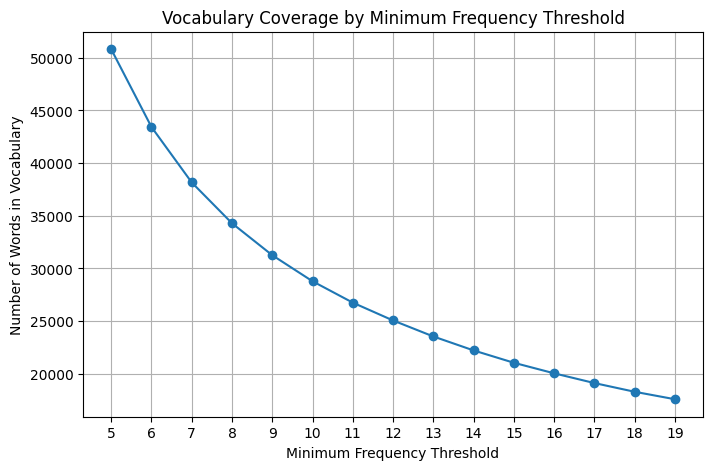

In [ ]:
# after fitting analyze the vocabulary coverage by frequency threshold

word_counts = Counter()
cleaned_texts = [preprocessor.clean_text(text) for text in X_train]
for text in cleaned_texts:
    word_counts.update(text.split())
    
sorted_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

word_representation = {}
for min_freq in range(5, 20):
    words_above_threshold = [w for w, c in sorted_counts if c >= min_freq]
    word_representation[min_freq] = len(words_above_threshold)

plt.figure(figsize=(8, 5))
plt.plot(list(word_representation.keys()), list(word_representation.values()), marker='o')
plt.title('Vocabulary Coverage by Minimum Frequency Threshold')
plt.xlabel('Minimum Frequency Threshold')
plt.ylabel('Number of Words in Vocabulary')
plt.xticks(range(5, 20))
plt.grid()
plt.show()

💡 **Observation**

Vocabulary size is choosen on 50K to take into account much more information, but due to the compute time maybe this graph can help to reduce the amount of words considered based on the minimum frequency of the words. Just in case.

# Models

## Metrics

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, hamming_loss
from sklearn.metrics import average_precision_score, precision_recall_curve, precision_recall_fscore_support
from scipy.sparse import hstack, csr_matrix

In [41]:
def get_per_label_metrics(y_true, y_pred, y_proba, label_names):
    metrics_list = []
    
    # Precision, Recall, F1 per ogni label
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)
    
    for i, name in enumerate(label_names):
        # ROC-AUC specifica per la label i
        roc_auc = roc_auc_score(y_true[:, i], y_proba[:, i])
        pr_auc = average_precision_score(y_true[:, i], y_proba[:, i])
        
        metrics_list.append({
            'Label': name,
            'Precision': precision[i],
            'Recall': recall[i],
            'F1-Score': f1[i],
            'ROC-AUC': roc_auc,
            'PR-AUC': pr_auc
        })
    
    return pd.DataFrame(metrics_list)

In [42]:
def get_global_metrics(y_true, y_pred, y_proba):
    metrics = {
        'F1_Macro': f1_score(y_true, y_pred, average='macro'),
        'F1_Micro': f1_score(y_true, y_pred, average='micro'),
        'ROC_AUC_Macro': roc_auc_score(y_true, y_proba, average='macro'),
        'ROC_AUC_Micro': roc_auc_score(y_true, y_proba, average='micro'),
        'PR_AUC_Macro': average_precision_score(y_true, y_proba, average='macro'),
        'PR_AUC_Micro': average_precision_score(y_true, y_proba, average='micro'),
        'Hamming_Loss': hamming_loss(y_true, y_pred)
    }
    return metrics

In [43]:
def plot_pr_curves(y_true, y_proba, label_names, figsize=(10, 7)):
    plt.figure(figsize=figsize)
    
    for i, name in enumerate(label_names):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_proba[:, i])
        ap_score = average_precision_score(y_true[:, i], y_proba[:, i])
        
        plt.plot(recall, precision, label=f'{name} (AP = {ap_score:.2f})')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves by Label')
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.show()

In [44]:
# Struttura registro performance modelli
'''
performance_registry = {
    'LR_Baseline': {
        'global': pd.DataFrame,    # Micro/Macro F1, ROC-AUC, Hamming
        'per_label': pd.DataFrame, # Precision, Recall, F1, AUC per ogni label
        'curves': {                # Dati per replicare i plot PR/ROC senza ricalcolare tutto
            'label_name': {'precision': [...], 'recall': [...], 'auc': 0.53}
        },
        'hyperparameters': { ... },  # eventuali iperparametri usati
        'training_time': 65.4    # tempo di training in secondi
    },
    'GRU_v1': { ... },
    'LSTM_v1': { ... }
}
'''

"\nperformance_registry = {\n    'LR_Baseline': {\n        'global': pd.DataFrame,    # Micro/Macro F1, ROC-AUC, Hamming\n        'per_label': pd.DataFrame, # Precision, Recall, F1, AUC per ogni label\n        'curves': {                # Dati per replicare i plot PR/ROC senza ricalcolare tutto\n            'label_name': {'precision': [...], 'recall': [...], 'auc': 0.53}\n        },\n        'hyperparameters': { ... },  # eventuali iperparametri usati\n        'training_time': 65.4    # tempo di training in secondi\n    },\n    'GRU_v1': { ... },\n    'LSTM_v1': { ... }\n}\n"

In [45]:
def update_comparison_table(registry_df, model_name, global_metrics):
    """
    registry_df: il DataFrame che contiene tutti i confronti precedenti
    model_name: stringa (es. 'LR_Baseline' o 'BiGRU_v1')
    global_metrics: il dizionario restituito dalla tua funzione get_global_metrics
    """
    new_row = pd.DataFrame([global_metrics], index=[model_name])
    return pd.concat([registry_df, new_row])

In [46]:
def log_experiment(registry_df, model_name, params, global_metrics):
    """
    params: dizionario degli iperparametri
    global_metrics: dizionario delle metriche (F1, AUC, ecc.)
    """
    # Uniamo i due dizionari (iperparametri + metriche)
    experiment_data = {**params, **global_metrics}
    
    # Creiamo una riga per il DataFrame
    new_row = pd.DataFrame([experiment_data], index=[model_name])
    
    # Aggiungiamo al registro esistente
    return pd.concat([registry_df, new_row])

## Benchmarck 

Logistic Regression multi-label

CPU times: total: 0 ns
Wall time: 0 ns


,Label,Precision,Recall,F1-Score,ROC-AUC,PR-AUC
0,toxic,0.654805,0.858326,0.742879,0.973961,0.864880
1,severe_toxic,0.291961,0.866109,0.436709,0.988261,0.435586
2,obscene,0.684339,0.885647,0.772087,0.985434,0.882429
3,threat,0.306452,0.791667,0.441860,0.985942,0.517523
4,insult,0.556736,0.843353,0.670707,0.979301,0.770536
5,identity_hate,0.238255,0.672986,0.351921,0.976434,0.429096



Global Metrics:


,F1_Macro,F1_Micro,ROC_AUC_Macro,ROC_AUC_Micro,PR_AUC_Macro,PR_AUC_Micro,Hamming_Loss
0,0.56936,0.68127,0.981555,0.9848,0.650008,0.790461,0.029279


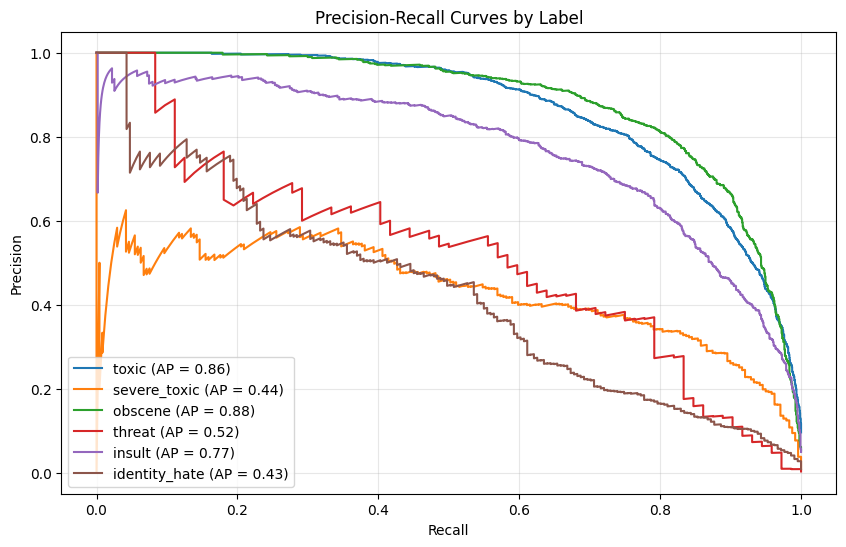

Training time: 71.8216 seconds


In [ ]:
vectorizer = TfidfVectorizer(
            max_features=50000,
            ngram_range=(1,2),
            min_df=2,
            max_df=0.95,
            sublinear_tf=True,
            strip_accents='unicode',
            analyzer='word',
            token_pattern=r'\w+',
            lowercase=True
        )
lr = LogisticRegression(
            max_iter=1000,
            C=1.0,
            solver='lbfgs',
            class_weight='balanced',
            random_state=42,
            verbose=1
        )
multi_label_lr = MultiOutputClassifier(lr, n_jobs=-1)

start_time = time.time()
cleaned_texts = [preprocessor.clean_text(text) for text in X_train]
X_tfidf = vectorizer.fit_transform(cleaned_texts)
X_tfidf_test = vectorizer.transform([preprocessor.clean_text(text) for text in X_test])

multi_label_lr.fit(X_tfidf, y_train)

y_pred = multi_label_lr.predict(X_tfidf_test)
y_proba = multi_label_lr.predict_proba(X_tfidf_test)
end_time = time.time()
labels = labels_df.columns.tolist() 
y_proba_consistent = np.column_stack([label_proba[:, 1] for label_proba in y_proba])

# 1. Analisi granulare
labels_metrics = get_per_label_metrics(y_test, y_pred, y_proba_consistent, labels)
display(labels_metrics)

# 2. Analisi globale
global_metrics = get_global_metrics(y_test, y_pred, y_proba_consistent)
print("\nGlobal Metrics:")
display(pd.DataFrame(global_metrics, index=[0]))

# 3. Visualizzazione
plot_pr_curves(y_test, y_proba_consistent, labels, figsize=(10, 6))

train_time = end_time - start_time
print(f"Training time: {train_time:.4f} seconds")

📊 **Consideration**:

The benchmark considers a TF-IDF word rapresentation and uses a Logistic Regression to classify the labels. As baseline we got good results considering that we're not taking care of context, semantic rapresentition, sequences that are all specific characteristics of RNN models.

About the baseline results we can assert:
- *toxic*, *obscene*, *insult* have good metrics especially on F1-score and PR-AUC, those are even the most frequent labels in the dataset (allowing the model to learn the patterns).
- *severe_toxic*, *threat*, *identity_hate* show much lower F1-scores and very low values on precision (high False Positive), behavior found also on the PR-AUC. Those are the least frenquent labels in the dataset with a representation under the 1% (rare).
- diffence in micro and macro F1 taking into account the frequency of the labels are evidence of the same problem above
- ROC-AUC is very good micro and macro, but joined with F1-scores low let us understand that the  default threshold (0,5) it's not optimal (due to the umbalance labels representation) 

## RNN Models

- Bidirectional to better capture the context
- Consider Attention mechanism
- Embedding
- Output Layer -> Dense with sigmoid (for the multi-label, not softmax)  

In [ ]:
def encode_multilabel(self, labels):
    """
    Input: ['toxic', 'insult'] 
    Output: [1, 0, 0, 0, 1, 0]  # one-hot per le 6 classi
    """
    label_map = {
        'toxic': 0,
        'severe_toxic': 1,
        'obscene': 2,
        'threat': 3,
        'insult': 4,
        'identity_hate': 5
    }
    encoded = np.zeros(6)
    for label in labels:
        encoded[label_map[label]] = 1
    return encoded

### Embedding

In [ ]:
import numpy as np
from gensim.models import KeyedVectors

# Carica GloVe o FastText
def load_glove_embeddings(glove_path, word_index, embedding_dim=100):
    """
    word_index: dizionario {parola: indice} dal tokenizer
    """
    embeddings_index = {}
    
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    
    # Crea matrice di embedding
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
        # else: resta vettore di zeri (o random)
    
    return embedding_matrix

# Usa nel modello
word_index = preprocessor.tokenizer.word_index
embedding_matrix = load_glove_embeddings('glove.6B.100d.txt', word_index, 100)

model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=100,
              input_length=max_len,
              weights=[embedding_matrix],        # Carica pesi pre-trained
              trainable=False),                  # Freezali (opzionale)
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(6, activation='sigmoid')
])

### Class Weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calcola class weights per ogni label
def compute_multilabel_class_weights(y_train):
    """
    Calcola class weights per multi-label classification
    """
    weights = {}
    
    for i, label in enumerate(['toxic', 'severe_toxic', 'obscene', 
                               'threat', 'insult', 'identity_hate']):
        # Conta positivi e negativi
        n_pos = y_train[:, i].sum()
        n_neg = len(y_train) - n_pos
        
        # Formula: peso = n_samples / (n_classes * n_samples_class)
        # Oppure più semplice: peso_pos = n_neg / n_pos
        weight_pos = n_neg / n_pos if n_pos > 0 else 1.0
        
        weights[label] = {'neg': 1.0, 'pos': weight_pos}
        
        print(f"{label}: pos={n_pos} ({n_pos/len(y_train)*100:.2f}%), "
              f"neg={n_neg}, weight_pos={weight_pos:.2f}")
    
    return weights

class_weights = compute_multilabel_class_weights(y_train)

# Output esempio:
# toxic: pos=15294 (9.58%), neg=144706, weight_pos=9.46
# threat: pos=478 (0.30%), neg=159522, weight_pos=333.73  ← Molto alto!

In [ ]:
import tensorflow as tf
from tf.keras import backend as K

def weighted_binary_crossentropy(weights):
    """
    Custom loss function con class weights per multi-label
    
    weights: dict con peso per ogni label
    """
    def loss(y_true, y_pred):
        # y_true, y_pred shape: (batch_size, 6)
        
        # Binary crossentropy standard
        bce = K.binary_crossentropy(y_true, y_pred)
        
        # Applica weights per label
        weight_vector = []
        for i, label in enumerate(['toxic', 'severe_toxic', 'obscene', 
                                   'threat', 'insult', 'identity_hate']):
            # Per ogni sample: se y_true=1 usa weight_pos, altrimenti 1.0
            weight_pos = weights[label]['pos']
            weight_i = y_true[:, i] * weight_pos + (1 - y_true[:, i]) * 1.0
            weight_vector.append(weight_i)
        
        weight_vector = K.stack(weight_vector, axis=1)
        
        # Loss pesata
        weighted_bce = bce * weight_vector
        
        return K.mean(weighted_bce)
    
    return loss

# Usa nel modello
model.compile(
    optimizer='adam',
    loss=weighted_binary_crossentropy(class_weights),  # ← Loss custom
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

### Focal loss

In [ ]:
def focal_loss(gamma=2.0, alpha=0.25):
    """
    Focal Loss per multi-label classification
    
    gamma: focusing parameter (più alto = più focus su hard examples)
    alpha: peso per la classe positiva
    """
    def loss(y_true, y_pred):
        # Clipping per stabilità numerica
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)
        
        # Calcola focal loss
        cross_entropy = -y_true * K.log(y_pred)
        
        # Focal term
        focal_weight = K.pow(1 - y_pred, gamma)
        
        # Alpha balancing
        alpha_weight = y_true * alpha + (1 - y_true) * (1 - alpha)
        
        focal_loss = alpha_weight * focal_weight * cross_entropy
        
        return K.mean(K.sum(focal_loss, axis=1))
    
    return loss

# Usa nel modello
model.compile(
    optimizer='adam',
    loss=focal_loss(gamma=2.0, alpha=0.25),  # Gamma alto per forte imbalance
    metrics=['accuracy']
)

### Threshold optimizaton

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Predici probabilità sul validation set
y_val_proba = model.predict([X_val_seq, X_val_feat])
# Shape: (n_val_samples, 6)

# Testa diversi threshold PER OGNI LABEL
def find_optimal_thresholds(y_true, y_proba):
    """
    Trova threshold ottimale per ogni label basandosi su F1-score
    """
    thresholds = {}
    
    for i, label_name in enumerate(['toxic', 'severe_toxic', 'obscene', 
                                     'threat', 'insult', 'identity_hate']):
        best_threshold = 0.5
        best_f1 = 0
        
        # Testa threshold da 0.1 a 0.9
        for threshold in np.arange(0.1, 0.9, 0.05):
            y_pred = (y_proba[:, i] > threshold).astype(int)
            f1 = f1_score(y_true[:, i], y_pred, zero_division=0)
            
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
        
        thresholds[label_name] = best_threshold
        print(f"{label_name}: threshold={best_threshold:.2f}, F1={best_f1:.3f}")
    
    return thresholds

# Trova threshold ottimali
optimal_thresholds = find_optimal_thresholds(y_val, y_val_proba)

# Salva per usarli in inference
import json
with open('models/thresholds.json', 'w') as f:
    json.dump(optimal_thresholds, f)

In [ ]:
'''CREAZIONE CLASSE MODELLO BENCHMARK TF-IDF + LOGISTIC REGRESSION
class Tfidf_LogisticRegression:
    """
    Modello benchmark con TF-IDF + Logistic Regression per hate speech detection.
    Usa solo TF-IDF sui testi puliti.
    """
    
    def __init__(self,
                 max_features=20000,
                 ngram_range=(1, 2),
                 max_iter=1000,
                 C=1.0,
                 solver='lbfgs',
                 random_state=42):
        """
        Args:
            max_features: numero massimo di feature TF-IDF
            ngram_range: range di n-grammi (1,1)=unigrams, (1,2)=unigrams+bigrams
            max_iter: numero massimo di iterazioni per LR
            C: parametro di regolarizzazione (inverse)
            solver: algoritmo di ottimizzazione
            random_state: seed per riproducibilità
        """
        self.max_features = max_features
        self.ngram_range = ngram_range
        self.max_iter = max_iter
        self.C = C
        self.solver = solver
        self.random_state = random_state
        
        # TF-IDF Vectorizer
        self.vectorizer = TfidfVectorizer(
            max_features=max_features,
            ngram_range=ngram_range,
            min_df=2,
            max_df=0.95,
            sublinear_tf=True,
            strip_accents='unicode',
            analyzer='word',
            token_pattern=r'\w+',
            lowercase=True
        )
        
        # Logistic Regression
        self.model = LogisticRegression(
            max_iter=max_iter,
            C=C,
            solver=solver,
            random_state=random_state,
            verbose=1
        )
        
        self._is_fitted = False
    
    def _prepare_features(self, texts, fit=False):
        """
        Prepara le feature: solo TF-IDF.
        
        Args:
            texts: list di stringhe (testi puliti)
            fit: se True, fit del vectorizer (solo per training)
            
        Returns:
            X: sparse matrix TF-IDF
        """
        if fit:
            X_tfidf = self.vectorizer.fit_transform(texts)
            print(f"✓ TF-IDF vocabulary size: {len(self.vectorizer.vocabulary_)}")
        else:
            X_tfidf = self.vectorizer.transform(texts)
        
        print(f"✓ TF-IDF matrix shape: {X_tfidf.shape}")
        print(f"✓ Final feature matrix shape: {X_tfidf.shape} (TF-IDF only)")
        
        return X_tfidf
    
    def fit(self, texts, y, preprocessor=None):
        """
        Fit del modello.
        
        Args:
            texts: list di stringhe (testi RAW)
            y: array (n_samples, n_classes) - One-Hot Encoded o labels
            preprocessor: HateSpeechPreprocessor opzionale per pulire i testi
        """
        print("=" * 60)
        print("TRAINING TF-IDF + LOGISTIC REGRESSION BENCHMARK")
        print("=" * 60)
        
        # Pulisci i testi se preprocessor è fornito
        if preprocessor is not None:
            print("🧹 Cleaning texts with preprocessor...")
            cleaned_texts = [preprocessor.clean_text(text) for text in texts]
        else:
            cleaned_texts = texts
        
        # Prepara features
        X = self._prepare_features(cleaned_texts, fit=True)
        
        # Converti OHE in label singole
        if len(y.shape) > 1 and y.shape[1] > 1:
            y_labels = np.argmax(y, axis=1)
            print(f"✓ Converted OHE to labels. Classes: {np.unique(y_labels)}")
        else:
            y_labels = y
        
        print(f"✓ Training samples: {X.shape[0]}")
        print(f"✓ Total features: {X.shape[1]}")
        print(f"✓ Number of classes: {len(np.unique(y_labels))}")
        print(f"✓ Class distribution: {np.bincount(y_labels)}")
        
        # Training
        print("\n🚀 Training Logistic Regression...")
        self.model.fit(X, y_labels)
        self._is_fitted = True
        
        print("✓ Training completed!")
        print("=" * 60)
        
        return self
    
    def predict(self, texts, preprocessor=None):
        """
        Predizione delle classi.
        
        Args:
            texts: list di stringhe (testi RAW)
            preprocessor: HateSpeechPreprocessor opzionale
            
        Returns:
            predictions: array (n_samples,)
        """
        if not self._is_fitted:
            raise ValueError("Model not fitted! Call .fit() first.")
        
        if preprocessor is not None:
            cleaned_texts = [preprocessor.clean_text(text) for text in texts]
        else:
            cleaned_texts = texts
        
        X = self._prepare_features(cleaned_texts, fit=False)
        return self.model.predict(X)
    
    def predict_proba(self, texts, preprocessor=None):
        """
        Predizione delle probabilità.
        
        Args:
            texts: list di stringhe (testi RAW)
            preprocessor: HateSpeechPreprocessor opzionale
            
        Returns:
            probabilities: array (n_samples, n_classes)
        """
        if not self._is_fitted:
            raise ValueError("Model not fitted! Call .fit() first.")
        
        if preprocessor is not None:
            cleaned_texts = [preprocessor.clean_text(text) for text in texts]
        else:
            cleaned_texts = texts
        
        X = self._prepare_features(cleaned_texts, fit=False)
        return self.model.predict_proba(X)
    
    def evaluate(self, texts, y, preprocessor=None, class_names=None):
        """
        Valuta il modello e stampa metriche dettagliate.
        
        Args:
            texts: list di stringhe (testi RAW)
            y: array (n_samples, n_classes) - One-Hot Encoded o labels
            preprocessor: HateSpeechPreprocessor opzionale
            class_names: list di nomi delle classi
            
        Returns:
            dict con le metriche
        """
        if not self._is_fitted:
            raise ValueError("Model not fitted! Call .fit() first.")
        
        print("\n" + "=" * 60)
        print("MODEL EVALUATION")
        print("=" * 60)
        
        if preprocessor is not None:
            cleaned_texts = [preprocessor.clean_text(text) for text in texts]
        else:
            cleaned_texts = texts
        
        X = self._prepare_features(cleaned_texts, fit=False)
        
        if len(y.shape) > 1 and y.shape[1] > 1:
            y_true = np.argmax(y, axis=1)
        else:
            y_true = y
        
        y_pred = self.model.predict(X)
        y_proba = self.model.predict_proba(X)
        
        print(f"Shape of y_proba: {y_proba.shape}") ### review
        
        accuracy = accuracy_score(y_true, y_pred)
        precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
        recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
        f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
        
        precision_weighted = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        recall_weighted = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)
        
        print(f"\n📊 OVERALL METRICS:")
        print(f"   Accuracy:         {accuracy:.4f}")
        print(f"\n   Macro averages:")
        print(f"   Precision (macro):  {precision_macro:.4f}")
        print(f"   Recall (macro):     {recall_macro:.4f}")
        print(f"   F1-Score (macro):   {f1_macro:.4f}")
        print(f"\n   Weighted averages:")
        print(f"   Precision (weighted): {precision_weighted:.4f}")
        print(f"   Recall (weighted):    {recall_weighted:.4f}")
        print(f"   F1-Score (weighted):  {f1_weighted:.4f}")
        
        print(f"\n📋 CLASSIFICATION REPORT:")
        print(classification_report(
            y_true, 
            y_pred,
            labels=class_names, 
            target_names=class_names,
            zero_division=0
        ))
        
        cm = confusion_matrix(y_true, y_pred)
        print(f"\n🔢 CONFUSION MATRIX:")
        print(cm)
        
        self._plot_confusion_matrix(cm, class_names)
        
        metrics = {
            'accuracy': accuracy,
            'precision_macro': precision_macro,
            'recall_macro': recall_macro,
            'f1_macro': f1_macro,
            'precision_weighted': precision_weighted,
            'recall_weighted': recall_weighted,
            'f1_weighted': f1_weighted,
            'confusion_matrix': cm,
            'y_true': y_true,
            'y_pred': y_pred,
            'y_proba': y_proba
        }
        
        print("=" * 60 + "\n")
        
        return metrics
    
    
    def _plot_confusion_matrix(self, cm, class_names=None):
        """Plot della confusion matrix"""
        plt.figure(figsize=(10, 8))
        
        if class_names is None:
            class_names = [f"Class {i}" for i in range(len(cm))]
        
        sns.heatmap(
            cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'}
        )
        
        plt.title('Confusion Matrix - TF-IDF + Logistic Regression Benchmark', 
                  fontsize=14, fontweight='bold')
        plt.ylabel('True Label', fontsize=12)
        plt.xlabel('Predicted Label', fontsize=12)
        plt.tight_layout()
        plt.show()
    
    def get_top_features(self, class_idx, top_n=20):
        """
        Ottieni le feature più importanti per una specifica classe.
        
        Args:
            class_idx: indice della classe
            top_n: numero di feature da mostrare
            
        Returns:
            dict con top positive e negative features
        """
        if not self._is_fitted:
            raise ValueError("Model not fitted!")
        
        # Ottieni i coefficienti per la classe
        coef = self.model.coef_[class_idx]
        
        # Ottieni i nomi delle feature TF-IDF
        feature_names = self.vectorizer.get_feature_names_out()
        n_tfidf_features = len(feature_names)
        
        # Top positive coefficients (TF-IDF features only)
        tfidf_coef = coef[:n_tfidf_features]
        top_pos_idx = np.argsort(tfidf_coef)[-top_n:][::-1]
        top_pos_features = [(feature_names[i], tfidf_coef[i]) for i in top_pos_idx]
        
        # Top negative coefficients
        top_neg_idx = np.argsort(tfidf_coef)[:top_n]
        top_neg_features = [(feature_names[i], tfidf_coef[i]) for i in top_neg_idx]
        
        return {
            'top_positive': top_pos_features,
            'top_negative': top_neg_features
        }
    
    def print_top_features(self, class_names=None, top_n=20):
        """
        Stampa le feature più importanti per ogni classe.
        
        Args:
            class_names: list di nomi delle classi
            top_n: numero di feature da mostrare
        """
        if not self._is_fitted:
            raise ValueError("Model not fitted!")
        
        print("\n" + "=" * 60)
        print("TOP FEATURES PER CLASS")
        print("=" * 60)
        
        n_classes = self.model.coef_.shape[0]
        
        for class_idx in range(n_classes):
            class_name = class_names[class_idx] if class_names else f"Class {class_idx}"
            features = self.get_top_features(class_idx, top_n)
            
            print(f"\n📌 {class_name.upper()}:")
            
            print(f"\n   ✅ Top {top_n} POSITIVE features (predict this class):")
            for feature, coef in features['top_positive']:
                print(f"      {feature:30s} : {coef:+.4f}")
            
            print(f"\n   ❌ Top {top_n} NEGATIVE features (predict against this class):")
            for feature, coef in features['top_negative']:
                print(f"      {feature:30s} : {coef:+.4f}")
        
        print("\n" + "=" * 60)
    
    def get_params(self):
        """Ottieni i parametri del modello"""
        return {
            'max_features': self.max_features,
            'ngram_range': self.ngram_range,
            'C': self.C,
            'solver': self.solver
            }
'''

In [ ]:
''' UTILIZZO DEL MODELLO BENCHMARK
print("\n🎯 TRAINING BENCHMARK MODEL...")

# Definisci nomi delle classi
class_names = labels_df.columns.tolist()

# Crea il modello
benchmark = Tfidf_LogisticRegression(
    max_features=20000,
    ngram_range=(1, 2),  # unigrams + bigrams
    max_iter=1000,
    C=1.0,
    random_state=42
)

# Training
benchmark.fit(
    X_train,  # testi RAW
    y_train,  # già in OHE
    #auxiliary_features=X_train_feat,
    preprocessor=preprocessor  # per pulire i testi
)

# 3. Evaluation
print("\n📊 EVALUATING ON TEST SET...")
test_metrics = benchmark.evaluate(
    X_val,
    y_val,
    preprocessor=preprocessor,
    class_names=class_names
)

# 4. Top Features per classe
benchmark.print_top_features(class_names=class_names, top_n=15)

# 5. Predizioni su nuovi dati
print("\n🔮 MAKING PREDICTIONS ON NEW DATA...")
new_texts = [
    "I hate you so much, you should die!",
    "Have a wonderful day! 😊",
    "You're an idiot and a loser"
]

# Estrai feature ausiliarie per i nuovi testi
new_feat = preprocessor._features_dict_to_array(
    [preprocessor.extract_auxiliary_features(text) for text in new_texts]
)

predictions = benchmark.predict(
    new_texts, 
    preprocessor=preprocessor
)

probabilities = benchmark.predict_proba(
    new_texts, 
    preprocessor=preprocessor
)

print("\n📝 Predictions:")
for text, pred, proba in zip(new_texts, predictions, probabilities):
    print(f"\nText: '{text}'")
    print(f"  → Predicted class: {class_names[pred]}")
    print(f"  → Probabilities:")
    for i, class_name in enumerate(class_names):
        print(f"      {class_name}: {proba[i]:.4f}")
'''